<a href="https://colab.research.google.com/github/khushhh11/CodSoft/blob/main/credit_card_fraud_detection/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the train dataset

In [ ]:
train_df=pd.read_csv("/content/fraudTrain.csv")
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


Loading the test dataset

In [ ]:
test_df=pd.read_csv("/content/fraudTest.csv")
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


Concatenating the train and test data

In [ ]:
combined_df=pd.concat([train_df, test_df], ignore_index=True)
data=combined_df

visualizing the shape of the dataset

In [ ]:
data.shape

(62267, 23)

Detecting the missing values in the dataset

In [ ]:
data.isna().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                      True
state                     True
zip                       True
lat                       True
long                      True
city_pop                  True
job                       True
dob                       True
trans_num                 True
unix_time                 True
merch_lat                 True
merch_long                True
is_fraud                  True
dtype: bool

Removing the missing values

In [ ]:
data.dropna()
data.dropna(inplace= True)


In [ ]:
data.isna().sum()

cc_num                     0
amt                        0
gender                     0
lat                        0
long                       0
city_pop                   0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
hour                       0
day_of_week                0
month                      0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
dtype: int64

Number of Fraud Transaction

In [ ]:
data['is_fraud'].value_counts()

0.0    61867
1.0      398
Name: is_fraud, dtype: int64

Data Visualization

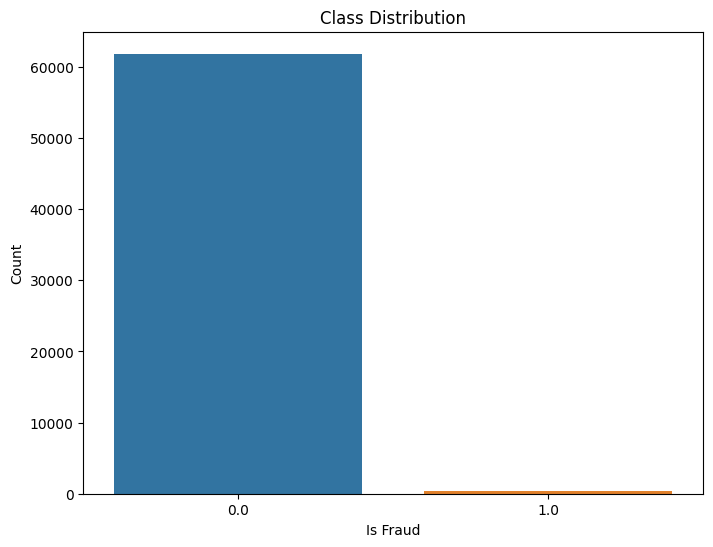

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data)
plt.title('Class Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

Data Preprocessing

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['month'] = data['trans_date_trans_time'].dt.month
data = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
data = pd.get_dummies(data, columns=['category'], drop_first=True)


data['gender'] = data['gender'].map({'M': 0, 'F': 1})


X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']
scaler = StandardScaler()
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

Looking for outliers in the data

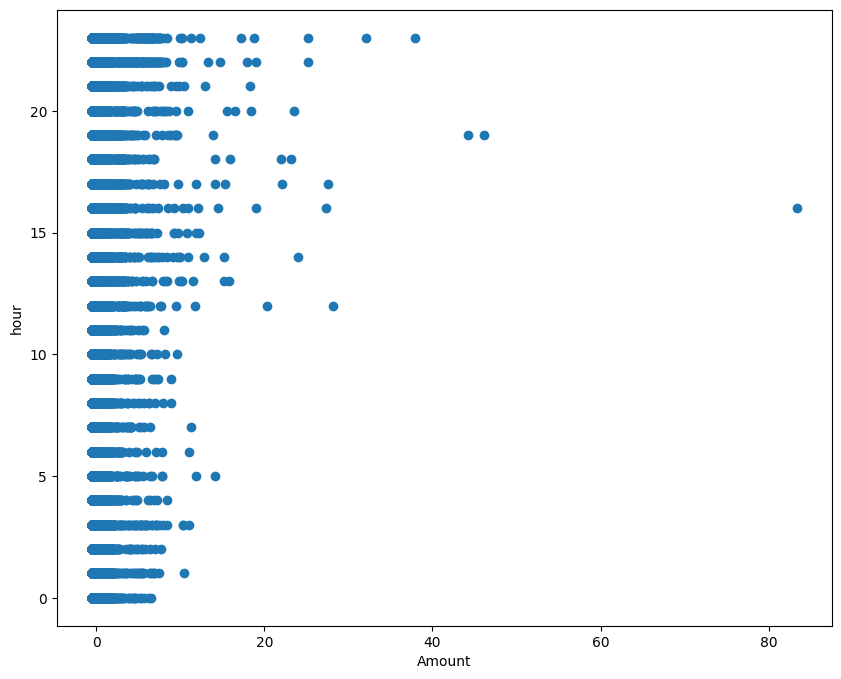

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(X['amt'], X['hour'])
ax.set_xlabel('Amount')
ax.set_ylabel('hour')
plt.show()

In [ ]:
fraud=data[data.is_fraud==1]
genuine=data[data.is_fraud==0]
print(fraud.shape)
print(genuine.shape)

(398, 26)
(61867, 26)


Staistical measures

In [ ]:
genuine.amt.describe()

count    61867.000000
mean        67.441919
std        133.961070
min          1.000000
25%          9.620000
50%         46.970000
75%         82.570000
max      11872.210000
Name: amt, dtype: float64

In [ ]:
fraud.amt.describe()

count     398.000000
mean      517.057638
std       385.500243
min         4.500000
25%       249.982500
50%       347.755000
75%       870.347500
max      1254.270000
Name: amt, dtype: float64

Undersampling

In [ ]:
genuine_sample= genuine.sample(n=398)
new_d=pd.concat([genuine_sample,fraud],axis=0)

In [ ]:
new_d.head()

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
1285,501831082224,140.48,0,40.9493,-78.3129,1762.0,1.325430e+09,41.743944,-77.743481,0.0,...,0,0,0,0,0,0,1,0,0,0
57891,3536918668124647,2.32,1,37.3304,-121.7913,973849.0,1.372671e+09,36.744913,-120.988460,0.0,...,0,0,0,0,0,0,0,1,0,0
12738,213173753804333,84.42,0,41.2244,-86.6966,5791.0,1.326011e+09,42.013445,-86.865831,0.0,...,0,0,0,0,0,0,0,0,0,0
3718,180046617132290,7.50,1,37.5750,-88.9655,3119.0,1.325565e+09,38.477894,-89.388192,0.0,...,0,0,0,0,0,0,0,0,1,0
20514,213107169859697,58.12,1,40.8874,-111.9027,13983.0,1.326457e+09,40.546838,-111.400443,0.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
new_d['is_fraud'].value_counts()

0.0    398
1.0    398
Name: is_fraud, dtype: int64

In [ ]:
new_d.groupby('is_fraud').mean()

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
is_fraud,,,,,,,,,,,,,,,,,,,,,
0.0,4.953084e+17,79.608693,0.570352,38.437966,-91.153493,116039.726131,1.351393e+09,38.439273,-91.083339,12.982412,...,0.075377,0.070352,0.115578,0.087940,0.055276,0.057789,0.065327,0.085427,0.097990,0.045226
1.0,2.990334e+17,517.057638,0.582915,39.697065,-88.311322,114104.223618,1.342820e+09,39.701654,-88.311103,13.155779,...,0.263819,0.025126,0.020101,0.032663,0.128141,0.027638,0.017588,0.223618,0.092965,0.020101


Splitting the dataset in train, test and validaton data

In [ ]:
x=new_d.drop(['is_fraud'],axis=1)
y=new_d['is_fraud']
xtrain,xtest,ytrain ,ytest= train_test_split(x,y,test_size=0.2, random_state= 2)
print(x.shape, xtrain.shape, xtest.shape)

(796, 25) (636, 25) (160, 25)


## Logistic Regression

Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)


LogisticRegression()

Finding the Accuracy

In [ ]:
y_pred = model.predict(xtest)
accuracy=model.score(xtest,ytest)
print(accuracy)
print('Accuracy score of the Logistic Regression Model : ' , accuracy*100, '%')

0.45
Accuracy score of the Logistic Regression Model :  45.0 %


Finding the Confusion Matrix

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)


[[72  0]
 [88  0]]


## Random Forest Classifer

Fitting Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [ ]:
y_pred = classifier.predict(xtest)

Claasification report and confusion matrix

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(ytest, y_pred))
conf_mat = confusion_matrix(y_true=ytest, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        72
         1.0       0.97      0.94      0.95        88

    accuracy                           0.95       160
   macro avg       0.95      0.95      0.95       160
weighted avg       0.95      0.95      0.95       160

Confusion matrix:
 [[69  3]
 [ 5 83]]


Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,y_pred)

In [ ]:
print('Accuracy score of the Random Forest Classifier :' , accuracy*100, '%')

Accuracy score of the Random Forest Classifier : 95.0 %
